In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('breast-cancer-wisconsin.csv')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [3]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [4]:
print(data.shape)

(683, 11)


In [5]:
#머신러닝에서 가장 먼저 해야할일은 특성치와 레이블을 나누는것

In [6]:
X2=data[data.cloumns[1:10]]
X3=data.loc[:, 'Clump_Thickness':'Mitoses']


AttributeError: 'DataFrame' object has no attribute 'cloumns'

In [7]:
X2=data[data.columns[1:10]]
X3=data.loc[:, 'Clump_Thickness':'Mitoses']



In [8]:
print(X2.shape)
print(X3.shape)


(683, 9)
(683, 9)


In [9]:
y=data[['Class']]
print(y,shape)


NameError: name 'shape' is not defined

In [10]:
y=data[['Class']]
print(y.shape)

(683, 1)


In [11]:
#분류작업 이후 shape으로 결과를 확인하자. shape은 print를 통해서 한다. 


In [12]:
#2 특성치와 레이블을 나누었다면 그다음에 할일은 테스트셋과 트레이닝셋으로 나누는작업

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, stratify='y', random_state=42)

NameError: name 'X' is not defined

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X2,y, stratify='y', random_state=42)

TypeError: Singleton array array('y', dtype='<U1') cannot be considered a valid collection.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X2,y, stratify=y, random_state=42)

In [16]:
print(y_train.mean())
print(y_test.mean())
print(X_train.mean())
print(X_test.mean())


Class    0.349609
dtype: float64
Class    0.350877
dtype: float64
Clump_Thickness                4.355469
Cell_Size                      3.087891
Cell_Shape                     3.185547
Marginal_Adhesion              2.845703
Single_Epithelial_Cell_Size    3.171875
Bare_Nuclei                    3.570312
Bland_Chromatin                3.423828
Normal_Nucleoli                2.791016
Mitoses                        1.607422
dtype: float64
Clump_Thickness                4.701754
Cell_Size                      3.339181
Cell_Shape                     3.304094
Marginal_Adhesion              2.783626
Single_Epithelial_Cell_Size    3.421053
Bare_Nuclei                    3.467836
Bland_Chromatin                3.508772
Normal_Nucleoli                3.105263
Mitoses                        1.590643
dtype: float64


In [17]:
# 3특성치의 단위를 정규화 해야한다. 그래야 y에게 미치는 영향정도가 동일해지기때문이다. 정규화에서는 Minmax or standard scaler가 사용된다.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [19]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax_transform(X_test)


NameError: name 'scaler_minmax_transform' is not defined

In [20]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [21]:
pd.DataFrame(X_scaled_minmax_train).describe()
pd.DataFrame(X_scaled_minmax_test).describe()


,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
scaler_standard.firt(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)


AttributeError: 'StandardScaler' object has no attribute 'firt'

In [25]:
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)

In [26]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [27]:
X_scaled_standard_test=scaler_standard.transform(X_test)

In [28]:
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


In [29]:
#4 훈련데이터에 fit을 하기때문에 test 데이터는 standard-scaleling의 경우, 평균이 0, 표준편차 1이 되지 못한다. 

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)


LogisticRegression()

In [31]:
pred_train=model.predict(X-scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)



NameError: name 'X' is not defined

In [32]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

In [33]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)


0.9590643274853801

In [34]:
from skelearn.metrics confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
confusion_train

SyntaxError: invalid syntax (<ipython-input-34-3924be1c82bc>, line 1)

In [35]:
from skelearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
confusion_train

ModuleNotFoundError: No module named 'skelearn'

In [36]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
confusion_train

array([[328,   5],
       [  9, 170]])

In [37]:
confusion_test=confusion_matrix(y_test, pred_test)

In [38]:
confusion_test

array([[106,   5],
       [  2,  58]])

In [39]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("Classification Report On Train data: \n", cfreport_train)

Classification Report On Train data: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [40]:
cfreport_test=classification_report(y_test, pred_test)
print("Classification Report On Test Data: \n", cfreport_test)

Classification Report On Test Data: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive rate, thresholds= roc_curve(y_test, model.descision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_tst))
roc_auc

SyntaxError: invalid syntax (<ipython-input-41-6d8c5034cb81>, line 3)

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, model.descision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_tst))
roc_auc

AttributeError: 'LogisticRegression' object has no attribute 'descision_function'

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, model.descision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_tst))
roc_auc

AttributeError: 'LogisticRegression' object has no attribute 'descision_function'

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, model.descision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_tst))
roc_auc

AttributeError: 'LogisticRegression' object has no attribute 'descision_function'

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_tst))
roc_auc

NameError: name 'X_scaled_minmax_tst' is not defined

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds= roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc=metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

In [47]:
#ROC_AUC가 무엇인가? 찾아서 달아두기 

In [48]:
plt.title("REceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_postive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.pot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()
         
         

SyntaxError: EOL while scanning string literal (<ipython-input-48-93fabba76296>, line 1)

In [49]:
plt.title('Rceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_postive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.pot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-49-ff1db0a45863>, line 6)

NameError: name 'false_postive_rate' is not defined

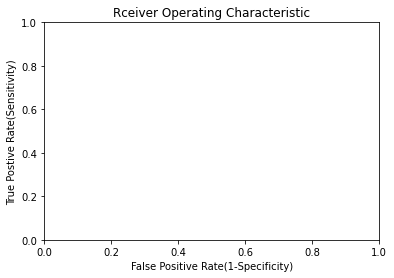

In [50]:
plt.title('Rceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_postive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.pot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()

NameError: name 'false_postive_rate' is not defined

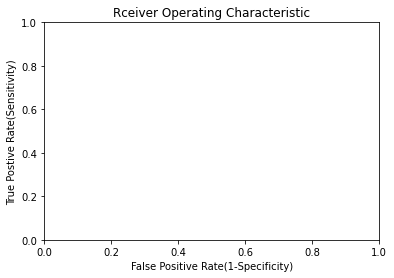

In [51]:
plt.title('Rceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_postive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.pot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'pot'

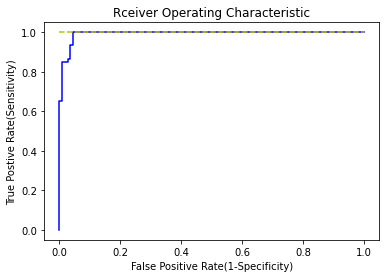

In [52]:
plt.title('Rceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.pot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()

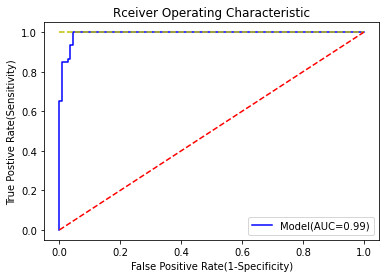

In [53]:
plt.title('Rceiver Operating Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Postive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label=
        'Model(AUC=%0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
         

plt.legend(loc='lower right')
plt.show()

In [54]:
prob_train=model.predict_proba(X_scaled_minmax_train)
y_train[['y_pred']]=pred_train
y_train[['y_prob0','y_prob1']]=prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [55]:
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test[['y_preb0','y_prob1']]=prob_test
y_test

,Class,y_pred,y_preb0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [56]:
Total_test=pd.concat([X_test,y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_preb0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [57]:
Total_test.to_csv('classification_test.csv')
